## Example Usecase for Movies
https://www.kernix.com/blog/recommender-system-based-on-natural-language-processing_p10

Used algorithm LSI (LSA). 
Idea: Texts that contain similar words have a similar meaning.

## Preprocessing
  
We create a so called bag of words. This means that for each text we throw all words into a "bag" so we ignore the ordering and just look at which words occur how often. This can be thought of as a matrix where each row corresponds to a word and each column is a text. The value written is either 0, 1 for occured or did not occur or the number of occurences or the tf-idf value (text frequency - inverse document frequency).  

In [1]:
import numpy as np
texts = ["This is a text about blockchain.", "Is that a text about IoT?"]

def split_words(texts):
  words = set()
  for t in texts:
    words = words.union(t.lower().split(" "))
    
  words = list(words)
  return words
  
words = split_words(texts)
print(words)
print(np.array([[int(w in s) for s in texts] for w in words]))

['text', 'iot?', 'this', 'blockchain.', 'about', 'that', 'is', 'a']
[[1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]]


By taking tolower we identyfied that "Is" and "is" are the same words but for example "text." and "text" are seen as different. So we want to do an additional step where we delete non words. This can be done easily by some regex.
Still words like "book" and "books" or "walk" and "walked" are seen as different. To eliminate those differences we need some smarter language specific algorithms. This is called stemming, example library: snowball.
For some details see http://snowball.tartarus.org/texts/introduction.html
(Im pretty sure there is some neural network solution for this too. ~1980-1990 technology).

In [2]:
from nltk.stem import SnowballStemmer
words = ["book", "books", "walk", "walked", "die", "dying", "happy", "unhappy",
"become", "became"]
words2 = ["money", "cash", "cheaply", "reply", "sun", "sunshine",
"dictator", "dictatorship", "house", "huose", ]
stemmer = SnowballStemmer("english") 
stemmed = [stemmer.stem(w) for w in words]
stemmed2 = [stemmer.stem(w) for w in words2]
print(stemmed)
print(stemmed2)

['book', 'book', 'walk', 'walk', 'die', 'die', 'happi', 'unhappi', 'becom', 'becam']
['money', 'cash', 'cheapli', 'repli', 'sun', 'sunshin', 'dictat', 'dictatorship', 'hous', 'huos']


I would say better than what i could have implemented and definetly useful but has some serious limitations.  
  
  
Also if you look at the similarities of the first example then it would show that these two texts are quite similar because they have the meaningless words "is,a, about" in common. Another preprocessing step is to delete such useless words (stopwords).  
We do this by just taking a list of known english stopwords and delete those from our texts. (static)
  
Usually this word text matrix is really spars so instead of keeping a trillion 0 in memory we use a sparse matrix notation. Saving only the (row_number, column_number, value) where the value is not 0. Storing 3 $\cdot$ nr_non_zeroes instead of rows $\cdot$ columns. This is also called corpus.
  
By having this translationg we get word vecs for each text and we could just measure how similar two of these vecs are. This would be a algorithm that hasnt learned anything from the data though.
  
## Creating an LSI model
The idea is to reduce dimensions and learn topics. So that the algorithm can learn words that are similar and not only check if two texts have the same words in it. So if there is a text like "bmw is a car" and one with "vw is a car" that it will learn the topic "bmw car vw" and if we get two texts "i have a bmw" and "i want a vw" that thw algorithm can now knwo that they both talk about cars while just comparing the bag of words vectors of those two would not show similarity.

In [3]:
import numpy as np
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
row_words = ["bmw", "sun", "car", "beach", "vw"]
texts = ["bmw are cars", "vw is a car", "sun and beach"]

texts = [t.split(" ") for t in texts]
print(texts)

def stem_and_stop(texts):
    stemmer = SnowballStemmer("english")
    stemmed = [[stemmer.stem(w.lower()) for w in words] for words in texts]
    stopwords_set = set(stopwords.words("english"))
    final_words = [[w for w in words if w not in set(stopwords.words("english"))] for words in stemmed]
    return final_words

final_words = stem_and_stop(texts)
distinct_words = set([w for text in final_words for w in text])
print(final_words)
print(distinct_words)
words_text_mat = np.array([[int(w in s) for s in final_words] for w in distinct_words])
print(words_text_mat)
words_text_mat = text_to_mat(texts)

u, s, vh = np.linalg.svd(words_text_mat, compute_uv=True, full_matrices=False)
u = np.round(u, 1)
print(u)

[['bmw', 'are', 'cars'], ['vw', 'is', 'a', 'car'], ['sun', 'and', 'beach']]
[['bmw', 'car'], ['vw', 'car'], ['sun', 'beach']]
{'beach', 'car', 'sun', 'vw', 'bmw'}
[[0 0 1]
 [1 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


NameError: name 'text_to_mat' is not defined

The columns of this matrix are the topics ordered by importance. As we can see the most important topic is actually the topic containing vw,bmw and car and the second most important topic contains the other words sun and beach.  
  
So the algorithm learned that vw and bmw are both cars or atleast made a connection between those. If we score the similarity between the two new texts "bmw in the sun" and "vw on the beach". Then these are translatet into word vectors as:

In [4]:
new_texts = ["bmw in the sun", "vw on the beach"]

print(mat)

NameError: name 'mat' is not defined

Latent semantic analysis of destination texts

In [5]:
from recommender.nlp import LanguageProcessing
from recommender.database import Database
d = Database()
L = LanguageProcessing(d)


99 number of words used from texts.


In [6]:
from gensim import corpora, models, similarities
import numpy as np
from matplotlib import pyplot as plt
L.model.get_topics()

array([[ 0.06672332,  0.09568237,  0.06538233,  0.12994779,  0.09183633,
         0.08066679,  0.07110254,  0.06156563,  0.10348392,  0.13702186,
         0.11763355,  0.05786162,  0.08847333,  0.11252265,  0.07174503,
         0.06712567,  0.0884296 ,  0.10196452,  0.10126636,  0.07062535,
         0.12547337,  0.10309626,  0.08555236,  0.06705072,  0.09909798,
         0.15859638,  0.08249048,  0.12884674,  0.09255231,  0.06856401,
         0.15168994,  0.07931109,  0.08194706,  0.07272035,  0.10932118,
         0.0716604 ,  0.13385346,  0.1121864 ,  0.16052272,  0.09505883,
         0.12570838,  0.13201864,  0.1805566 ,  0.10779355,  0.07458312,
         0.07964033,  0.09806922,  0.06749697,  0.09597825,  0.10014629,
         0.09970522,  0.09534844,  0.06040293,  0.05785817,  0.15592001,
         0.21065678,  0.07919009,  0.16160998,  0.09907025,  0.0643052 ,
         0.14415596,  0.07449204,  0.13448351,  0.14329419,  0.06112574,
         0.09447131,  0.07716153,  0.1049648 ,  0.0

Accordingly, the corpus object contains the destination texts, represented as sparse vectors.

In [7]:
print(L.corpus)

[[], [], [], [], [(0, 1), (1, 3), (2, 1), (3, 5), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 4), (11, 1), (12, 1), (13, 4), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 2), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 5), (31, 2), (32, 1), (33, 1), (34, 7), (35, 1), (36, 1), (37, 3), (38, 5), (39, 1), (40, 1), (41, 4), (42, 5)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [(6, 1), (7, 1), (9, 1), (17, 1), (18, 2), (36, 1), (41, 2), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1)], [], [], [], [], [], [], [], [], [], [], [], [(7, 1), (9, 1), (17, 1), (21, 2), (25, 1), (35, 1), (44, 1), (46, 1), (48, 1), (49, 2), (54, 1), (55, 3), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [(1, 2), (3, 3), (4, 1), (7, 1),

Creating the tf-idf transformation

In [8]:
corpus_tfidf = models.TfidfModel(L.corpus)[L.corpus].corpus
print(corpus_tfidf)

[[], [], [], [], [(0, 1), (1, 3), (2, 1), (3, 5), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 4), (11, 1), (12, 1), (13, 4), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 2), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 5), (31, 2), (32, 1), (33, 1), (34, 7), (35, 1), (36, 1), (37, 3), (38, 5), (39, 1), (40, 1), (41, 4), (42, 5)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [(6, 1), (7, 1), (9, 1), (17, 1), (18, 2), (36, 1), (41, 2), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1)], [], [], [], [], [], [], [], [], [], [], [], [(7, 1), (9, 1), (17, 1), (21, 2), (25, 1), (35, 1), (44, 1), (46, 1), (48, 1), (49, 2), (54, 1), (55, 3), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [(1, 2), (3, 3), (4, 1), (7, 1),

Choice of the number of topics: The linear semantic analysis identifies a set of topics related to the destination texts. The number of these topics N is equal to the dimension of the approximation matrix resulting from the Singular Value Decomposition dimension reduction technique. This number is a hyper-parameter to be carefully adjusted. It results from the selection of the N largest singular values of the tf-idf corpus matrix.

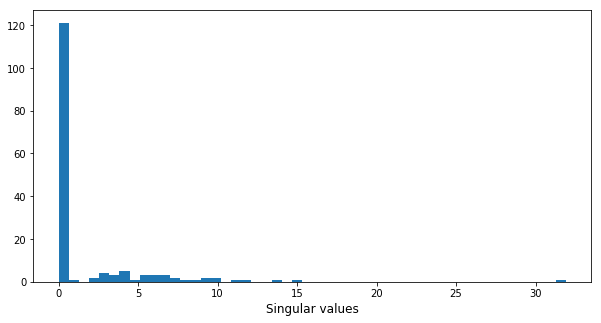

In [9]:
import gensim
words_text_mat = gensim.matutils.corpus2dense(L.corpus,  num_terms=51556) # 159 docs, 7396 words
s = np.linalg.svd(words_text_mat, full_matrices=False, compute_uv=False)
plt.figure(figsize=(10,5))
plt.hist(s, bins=50)
plt.xlabel('Singular values', fontsize=12)
plt.show()

The histogram illustrates the s singular values

Text(0,0.5,'Number of topics')

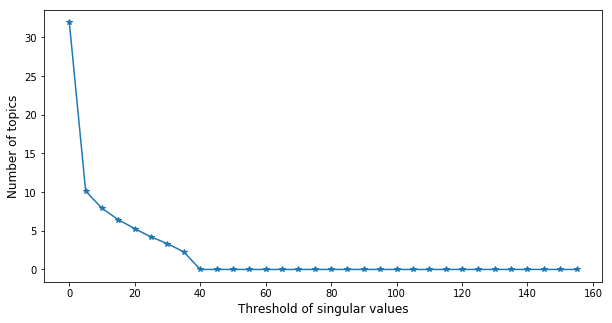

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(0,159,5),s[range(0,159,5)],  '*-')
plt.xlabel('Threshold of singular values', fontsize=12)
plt.ylabel('Number of topics', fontsize=12)

We then set several thresholds for the singular values and we compute the relative number of topics. We can see that from threshold equals 159, the number of topics is stabilized to 40 topics.

In [11]:
#L.ldamodel.get_document_topics()
u = L.lsi.get_topics()
ur = np.round(u, 2)
nr_words = 4
print("Top 2 topics")
def get_topics(v1, sgn):
    x = [(L.dictionary[i], v1[i]) for i in range(len(v1))] #if abs(v1[i]) > 0.1]
    x.sort(key=lambda a:a[1], reverse=True)
    if sgn:
        #sum([abs(a[1]) for a in x[0:3]]) >= sum([abs(a[1]) for a in x[-nr_words:]]):
        print(x[0:nr_words])
    else:
        tmp = x[-nr_words:]
        tmp.reverse()
        print(tmp)
for i in range(2):
    v1 = ur[i, :]

    get_topics(v1, True)


Top 2 topics
[('capit', 0.21), ('year', 0.18), ('mani', 0.16), ('time', 0.16)]
[('capit', 0.4), ('countri', 0.17), ('unesco', 0.15), ('south', 0.14)]


In [12]:
#L.destinations.index[L.destinations["iata_code"] == "BGI"][0]
L.model.get_topics()

array([[ 0.06672332,  0.09568237,  0.06538233,  0.12994779,  0.09183633,
         0.08066679,  0.07110254,  0.06156563,  0.10348392,  0.13702186,
         0.11763355,  0.05786162,  0.08847333,  0.11252265,  0.07174503,
         0.06712567,  0.0884296 ,  0.10196452,  0.10126636,  0.07062535,
         0.12547337,  0.10309626,  0.08555236,  0.06705072,  0.09909798,
         0.15859638,  0.08249048,  0.12884674,  0.09255231,  0.06856401,
         0.15168994,  0.07931109,  0.08194706,  0.07272035,  0.10932118,
         0.0716604 ,  0.13385346,  0.1121864 ,  0.16052272,  0.09505883,
         0.12570838,  0.13201864,  0.1805566 ,  0.10779355,  0.07458312,
         0.07964033,  0.09806922,  0.06749697,  0.09597825,  0.10014629,
         0.09970522,  0.09534844,  0.06040293,  0.05785817,  0.15592001,
         0.21065678,  0.07919009,  0.16160998,  0.09907025,  0.0643052 ,
         0.14415596,  0.07449204,  0.13448351,  0.14329419,  0.06112574,
         0.09447131,  0.07716153,  0.1049648 ,  0.0

In [13]:
for city_name in ["NYC", "BER", "LON", "BGI", "PMI", "HKG"]:
    print("\n" + city_name)
    city_index = L.destinations.index[L.destinations["iata_code"] == city_name][0]
    topic_vec=[x[1] for x in L.lsi[L.corpus[city_index]]]
    topic_vec_abs = np.abs(topic_vec)
    topic_indices = np.argpartition(topic_vec_abs, [-1,-2])[-3:]
    u = L.lsi.get_topics()
    for i in topic_indices:
        sgn = topic_vec[i] > 0
        ur = u[i,:]
        get_topics(ur,sgn)


NYC

BER

LON
[('capit', 0.40308890304039524), ('countri', 0.17248632391078642), ('unesco', 0.15438844504226792), ('south', 0.1405480425077304)]
[('capit', 0.21065677696274485), ('year', 0.18055660045410038), ('histori', 0.16160998243433722), ('time', 0.16052272385382146)]

BGI

PMI

HKG


In [ ]:
from recommender.nlp import LanguageProcessing
from recommender.database import Database
d = Database()
L = LanguageProcessing(d)
L.optimize_parameters()


99 number of words used from texts.
165 number of words used from texts.
{'algorithm': 'LSI', 'min_word_count': 6, 'no_above_fraction': 0.4, 'delete_numbers': True, 'delete_words': ['also'], 'nr_topics': 5, 'tfidf': True}
0
165 number of words used from texts.
{'algorithm': 'LSI', 'min_word_count': 6, 'no_above_fraction': 0.4, 'delete_numbers': True, 'delete_words': ['also'], 'nr_topics': 5, 'tfidf': False}
1
165 number of words used from texts.
{'algorithm': 'LDA', 'min_word_count': 6, 'no_above_fraction': 0.4, 'delete_numbers': True, 'delete_words': ['also'], 'nr_topics': 5, 'tfidf': True}
0
165 number of words used from texts.
{'algorithm': 'LDA', 'min_word_count': 6, 'no_above_fraction': 0.4, 'delete_numbers': True, 'delete_words': ['also'], 'nr_topics': 5, 'tfidf': False}
1
165 number of words used from texts.
{'algorithm': 'LSI', 'min_word_count': 6, 'no_above_fraction': 0.4, 'delete_numbers': True, 'delete_words': ['also'], 'nr_topics': 15, 'tfidf': True}
0
165 number of words u

Here we run both the LSI and LDA algorithms for different set of test inputs and with many different combinations of configuration parameters in order to obtain the configuration that rated the expected values the highest. (overfitting)